In [29]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import umap
import matplotlib.pyplot as plt
import os, sys
import random

In [2]:
path = "text"
dirs = os.listdir( path )
docs = []

for dir in dirs:
    f = open(path + '/' + dir, "r", encoding="utf8")
    docs.append(f.read())
    f.close()

In [19]:
vectorizer = TfidfVectorizer()
vect = vectorizer.fit(docs)
result = vectorizer.transform(docs)
df = pd.DataFrame(result.toarray(), columns = vect.get_feature_names())
#print(df.iloc[0:22, 0:200])

C:\Users\leoni\Desktop\pliki\python\nlp\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
reducer = umap.UMAP()
embedding = umap.UMAP(n_neighbors=2,
                      min_dist=0.3,
                      metric='correlation').fit_transform(result.toarray())

(22, 5042)


C:\Users\leoni\AppData\Local\Temp\ipykernel_12876\3788424782.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(point[0], point[1], 'ro', c=np.random.rand(3,), label='{} : {}'.format(idx,dirs[idx]))


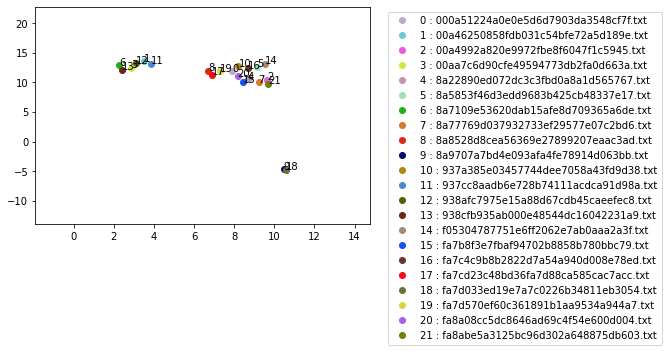

In [49]:
x = [element[0] for element in embedding]
y = [element[1] for element in embedding]
for idx, point in enumerate(embedding):
    plt.plot(point[0], point[1], 'ro', c=np.random.rand(3,), label='{} : {}'.format(idx,dirs[idx]))
    plt.text(point[0],point[1],idx)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
scale = 2.0
axis = np.array([(min(x) - max(x)) / 2 , (max(x) - min(x)) / 2, (min(y) - max(y)) / 2, (max(y) - min(y)) / 2])
axis *= scale;
axis += np.array([(max(x) + min(x)) / 2 , (max(x) + min(x)) / 2, (max(y) + min(y)) / 2, (max(y) + min(y)) / 2])
plt.axis(axis)
plt.show()
plt.ion()